In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['Target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


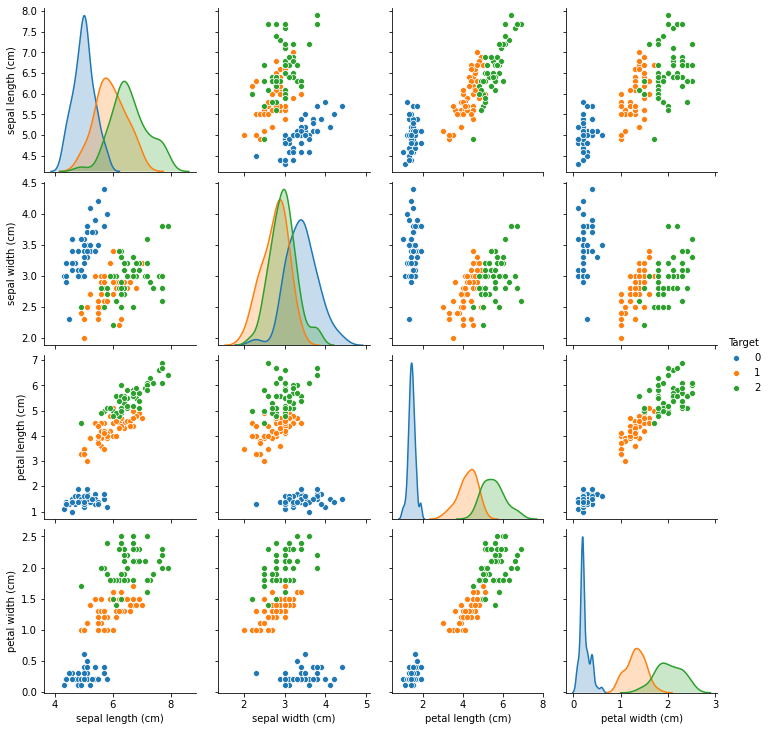

In [6]:
sns.pairplot(df,hue='Target')

### Para demonstração do KNN, vamos utilizar os atributos: largura da pétala e comprimento da pétala

In [7]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Target'],
      dtype='object')

In [8]:
X = df[['sepal length (cm)','petal width (cm)']]
y = df.Target

In [9]:
X[X.columns[0]]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int64

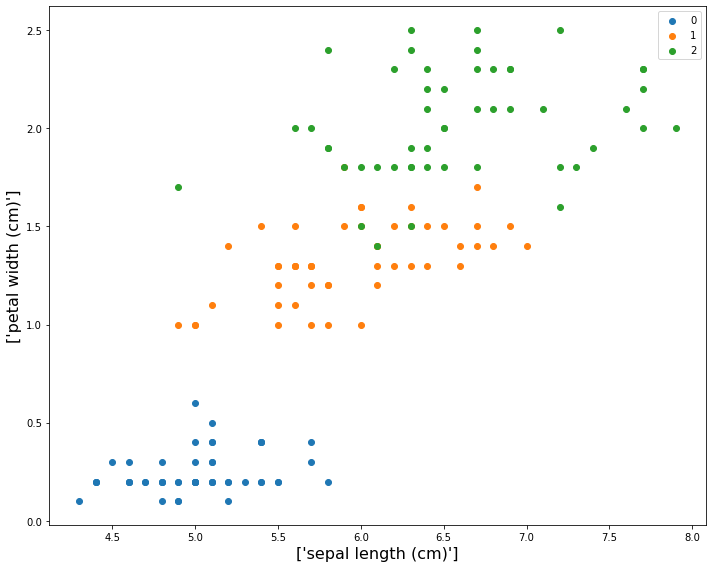

In [11]:
fig,axes = plt.subplots(figsize=(10,8))

for i in y.unique():
    axes.scatter(X[y==i][X.columns[0]],X[y==i][X.columns[1]],label=f'{i}')
    
axes.legend()

axes.set_xlabel([X.columns[0]],fontsize=16)
axes.set_ylabel([X.columns[1]],fontsize=16)

fig.tight_layout()

In [12]:
scaler = StandardScaler()

X_scale = scaler.fit(X)

#### Separando entre treino e teste

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Criando uma função para calcular a distância euclidenada

In [14]:
def euclidean_distance(X_1,X_2):
    X_1, X_2 = np.asarray(X_1), np.asarray(X_2)
    return np.sqrt(np.sum((X_2-X_1)**2,axis=1))

In [15]:
def K_nearest_neighborn(X_train,y_train,X,K):
    X_train, y_train = np.asarray(X_train), np.asarray(y_train)
    X=np.asarray(X)
    dist = np.asarray(np.zeros(len(X_train)))
    
    dist = euclidean_distance(X_train,X)
    
    return np.bincount(y_train[np.argsort(dist)[:K]]).argmax()

In [16]:
K = 7
y_pred = np.asarray([K_nearest_neighborn(X_train,y_train,x,K) for x in X_test.values])

In [17]:
y_pred

array([0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 1,
       2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [18]:
y_pred

array([0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 1,
       2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [19]:
X_test[y_test==i][X_test.columns[0]]

111    6.4
108    6.7
148    6.2
120    6.9
121    5.6
117    7.7
130    7.4
146    6.3
137    6.4
133    6.3
126    6.2
Name: sepal length (cm), dtype: float64

<ipython-input-20-1a55a7fadd58>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axes[0].scatter(X_train[y==i][X_train.columns[0]],X_train[y==i][X_train.columns[1]],label=f'{i}',c=c)
<ipython-input-20-1a55a7fadd58>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  axes[1].scatter(X_train[y==i][X_train.columns[0]],X_train[y==i][X_train.columns[1]],label=f'{i}',c=c)


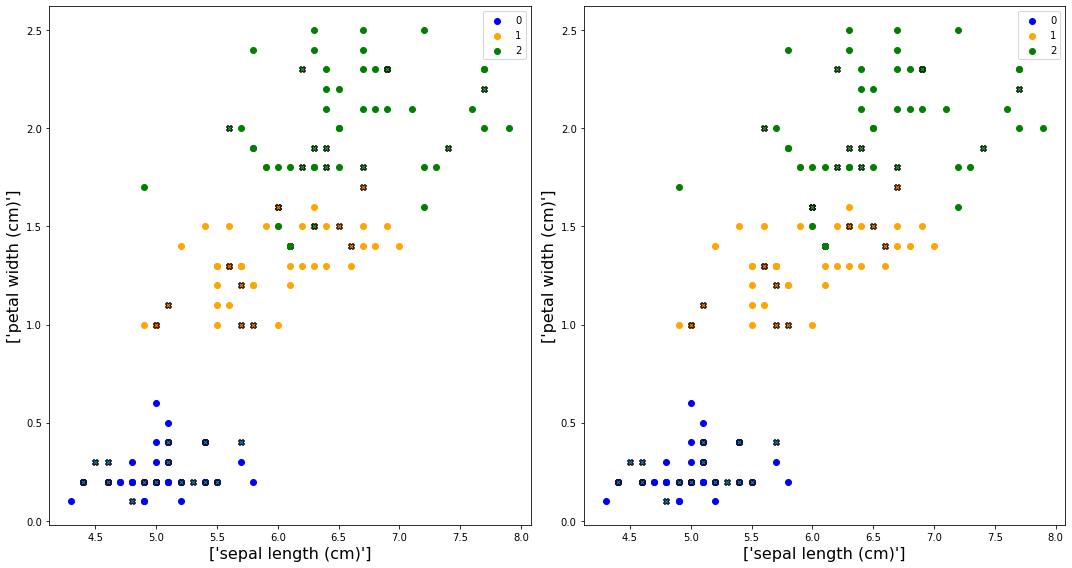

In [20]:
fig,axes = plt.subplots(ncols=2,figsize=(15,8))

for i,c in zip(y.unique(),['blue','orange','green']):
    axes[0].scatter(X_train[y==i][X_train.columns[0]],X_train[y==i][X_train.columns[1]],label=f'{i}',c=c)
    
    axes[0].scatter(X_test[y_test==i][X_test.columns[0]],X_test[y_test==i][X_test.columns[1]],
                 marker='X',edgecolor='black')

    
for i,c in zip(y.unique(),['blue','orange','green']):
    axes[1].scatter(X_train[y==i][X_train.columns[0]],X_train[y==i][X_train.columns[1]],label=f'{i}',c=c)
    
    axes[1].scatter(X_test[y_pred==i][X_train.columns[0]],X_test[y_pred==i][X_train.columns[1]],
                 marker='X',edgecolor='black')
    
axes[0].legend()
axes[1].legend()

axes[0].set_xlabel([X_train.columns[0]],fontsize=16)
axes[0].set_ylabel([X_train.columns[1]],fontsize=16)
axes[1].set_xlabel([X_train.columns[0]],fontsize=16)
axes[1].set_ylabel([X_train.columns[1]],fontsize=16)

fig.tight_layout()

### Estimando a probabilidade de cada amostra

In [21]:
def K_nearest_neighborn_prob(X_train,y_train,X,K):
    X_train, y_train = np.asarray(X_train), np.asarray(y_train)
    X=np.asarray(X)
    dist = np.asarray(np.zeros(len(X_train)))
    
    dist = euclidean_distance(X_train,X)
    
    return np.bincount(y_train[np.argsort(dist)[:K]],minlength=len(np.unique(y_train)))/K

In [22]:
K = 7
y_prob = np.asarray([K_nearest_neighborn_prob(X_train,y_train,x,K) for x in X_test.values])

In [23]:
y_prob

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.14285714, 0.85714286],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.42857143, 0.57142857],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.14285714, 0.85714286],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.